# Exemplo 5 - Aula 2 

Exemplo simples de árvore de decisão sobre ir ao trabalho de bicicleta ou não de acordo com condições do tempo com dados inseridos manualmente

In [2]:
# Importando bibliotecas necessárias para trabalhar com os dados e utilizar o modelo de ML
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [3]:
# criando os dados
temperature = [5,   8,    10,   12,   14,   14,   18,   21,   21,   10,   23,   24,   24,   25,   25,   26,   26,   26,   27,   27,   28,   28,   30,   32,   32   ]
rainfall    = [0,   25,   0,    2,    0,    4,    0,    0,    7,    20,   5,    0,    12,   35,   7,    0,    23,   25,   32,   0,    3,    4,    0,    2,    5    ]
wind_speed  = [5,   8,    2,    22,   12,   8,    0,    58,   62,   25,   18,   5,    12,   35,   7,    0,    23,   25,   23,   0,    3,    4,    0,    5,    2    ]
did_bike    = [True,False,True, True, True, True, True, False,False,False,True, True, True, False,True, True, False,False,False,True, False,False,False,False,False]

weather_conditions = []
for i in range(len(temperature)):
  weather_conditions.append([temperature[i], rainfall[i], wind_speed[i]])

# dividindo entre features e labels
X = weather_conditions # features
y = did_bike  # labels

In [4]:
# Criando a árvore de decisão com repetibilidade e treinando-a
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [5]:
# Realizando predições sobre determinadas condições climáticas
clf.predict([[25, 50, 50], [12, 15, 0], [20, 5, 45], [9, 0, 2]])

array([False,  True, False,  True])

[Text(223.20000000000002, 190.26, 'X[2] <= 22.5\ngini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(167.4, 135.9, 'X[0] <= 27.5\ngini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(111.60000000000001, 81.53999999999999, 'X[1] <= 18.5\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

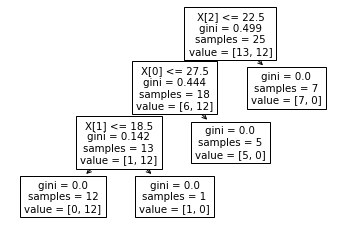

In [6]:
# Realizando plot da árvore de classificação para compreender o algoritmo criado pelo modelo
plot_tree(clf)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


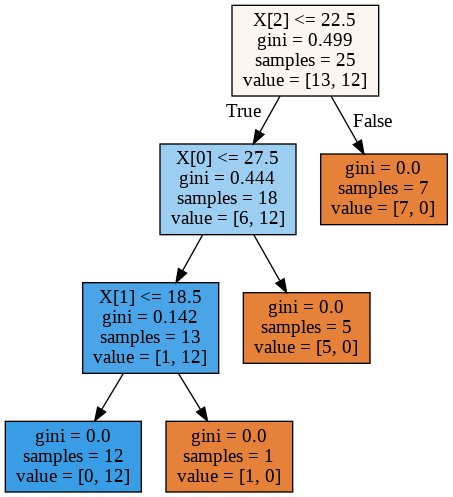

In [7]:
# Código do prof para plotar com mais detalhes e maior beleza
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())